In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from norm_param import convert_df

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 150

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Prepare data

In [2]:
data_ele = {"ele_match": "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/electrons/recordio_allinfo_v2/training/calo_matched/*.proto"}
data_gamma = {"gamma_match": "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/gammas/recordio_allinfo_v2/training/calo_matched/*.proto"}
data_nomatch = {"ele_nomatch": "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/electrons/recordio_allinfo_v2/training/no_calo_matched/*.proto",
                "gamma_nomatch": "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/gammas/recordio_allinfo_v2/training/no_calo_matched/*.proto"}

features = [ "en_cluster", "et_cluster", "cluster_ieta", "cluster_iphi", "cluster_iz"]

In [3]:
n = 100000
df_ele = convert_df(data_ele, features, n)
df_gamma = convert_df(data_gamma, features, n)
df_nomatch = convert_df(data_nomatch, features, n)

In [4]:
df = [df_ele, df_gamma, df_nomatch]
df_title = ['electron matched', 'gamma matched', 'no-matched']

# number of clusters range
ncl_range = [np.arange(1,10), np.arange(10,20), np.arange(20,30)]
ncl_title = ['1-9', '10-19', '20-29']

In [5]:
df_ele.head(3)

en_cluster  et_cluster  cluster_ieta  cluster_iphi  cluster_iz  is_seed  \
0 0  114.316826   49.874691          85.0         334.0         0.0      1.0   
  1    3.055926    1.329614          85.0         328.0         0.0      0.0   
  2    0.416764    0.201541          78.0         306.0         0.0      0.0   

     n_cl  
0 0     6  
  1     6  
  2     6

In [6]:
def draw_seed(variable):
    fig, axis = plt.subplots(2, 3, figsize=(15,10))

    for i in range(len(df)):
        n_cl = df[i][variable][df[i]['is_seed'] == 1.]

        ax = axis[0,i]
        ax.hist(n_cl, bins=30, histtype="step")
        ax.set_title(df_title[i])
        ax.set_yscale("log")

        ax = axis[1, i]
        for j, n in enumerate(ncl_range):
            ax.hist(df[i][variable][df[i]['is_seed'] == 1.][df[i]['n_cl'].isin(n)], label=ncl_title[j], bins=30, histtype="step")
            ax.set_yscale("log")
            ax.legend(title="N of clusters")
    fig.text(0.5, 0.08, variable+ ' of the seed', ha='center')

# Number of clusters per window

Text(0.5, 0.04, 'number of clusters')

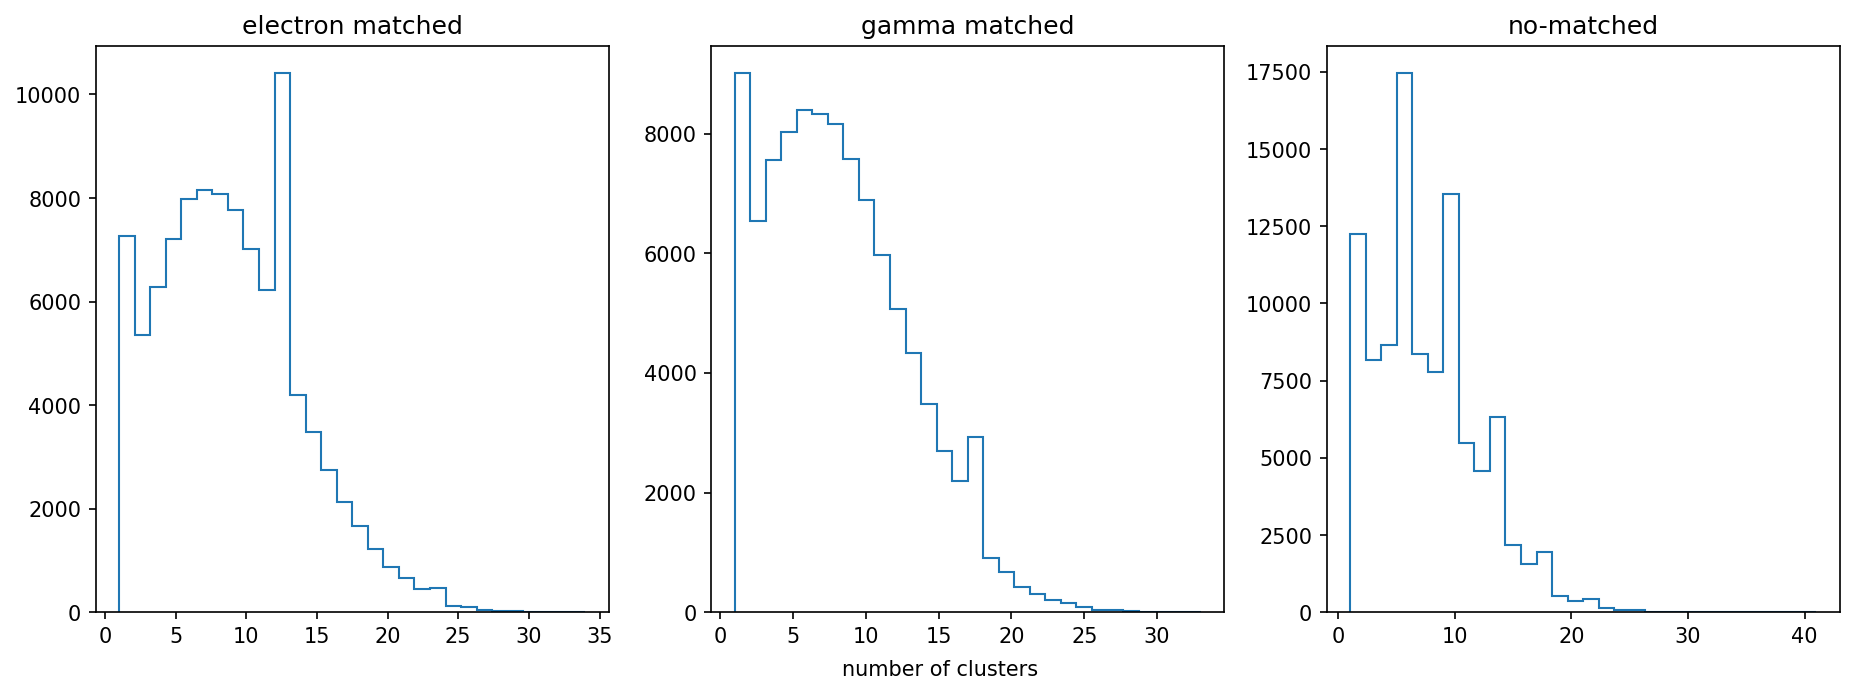

In [15]:
fig, axis = plt.subplots(1, 3, figsize=(15,5))

for i in range(len(df)):
    n_cl = df[i]['n_cl'][df[i]['is_seed'] == 1.]
    
    ax = axis[i]
    ax.hist(n_cl, bins=30, histtype="step")
    ax.set_title(df_title[i])

fig.text(0.5, 0.04, 'number of clusters', ha='center')

# Energy distribution of the seed

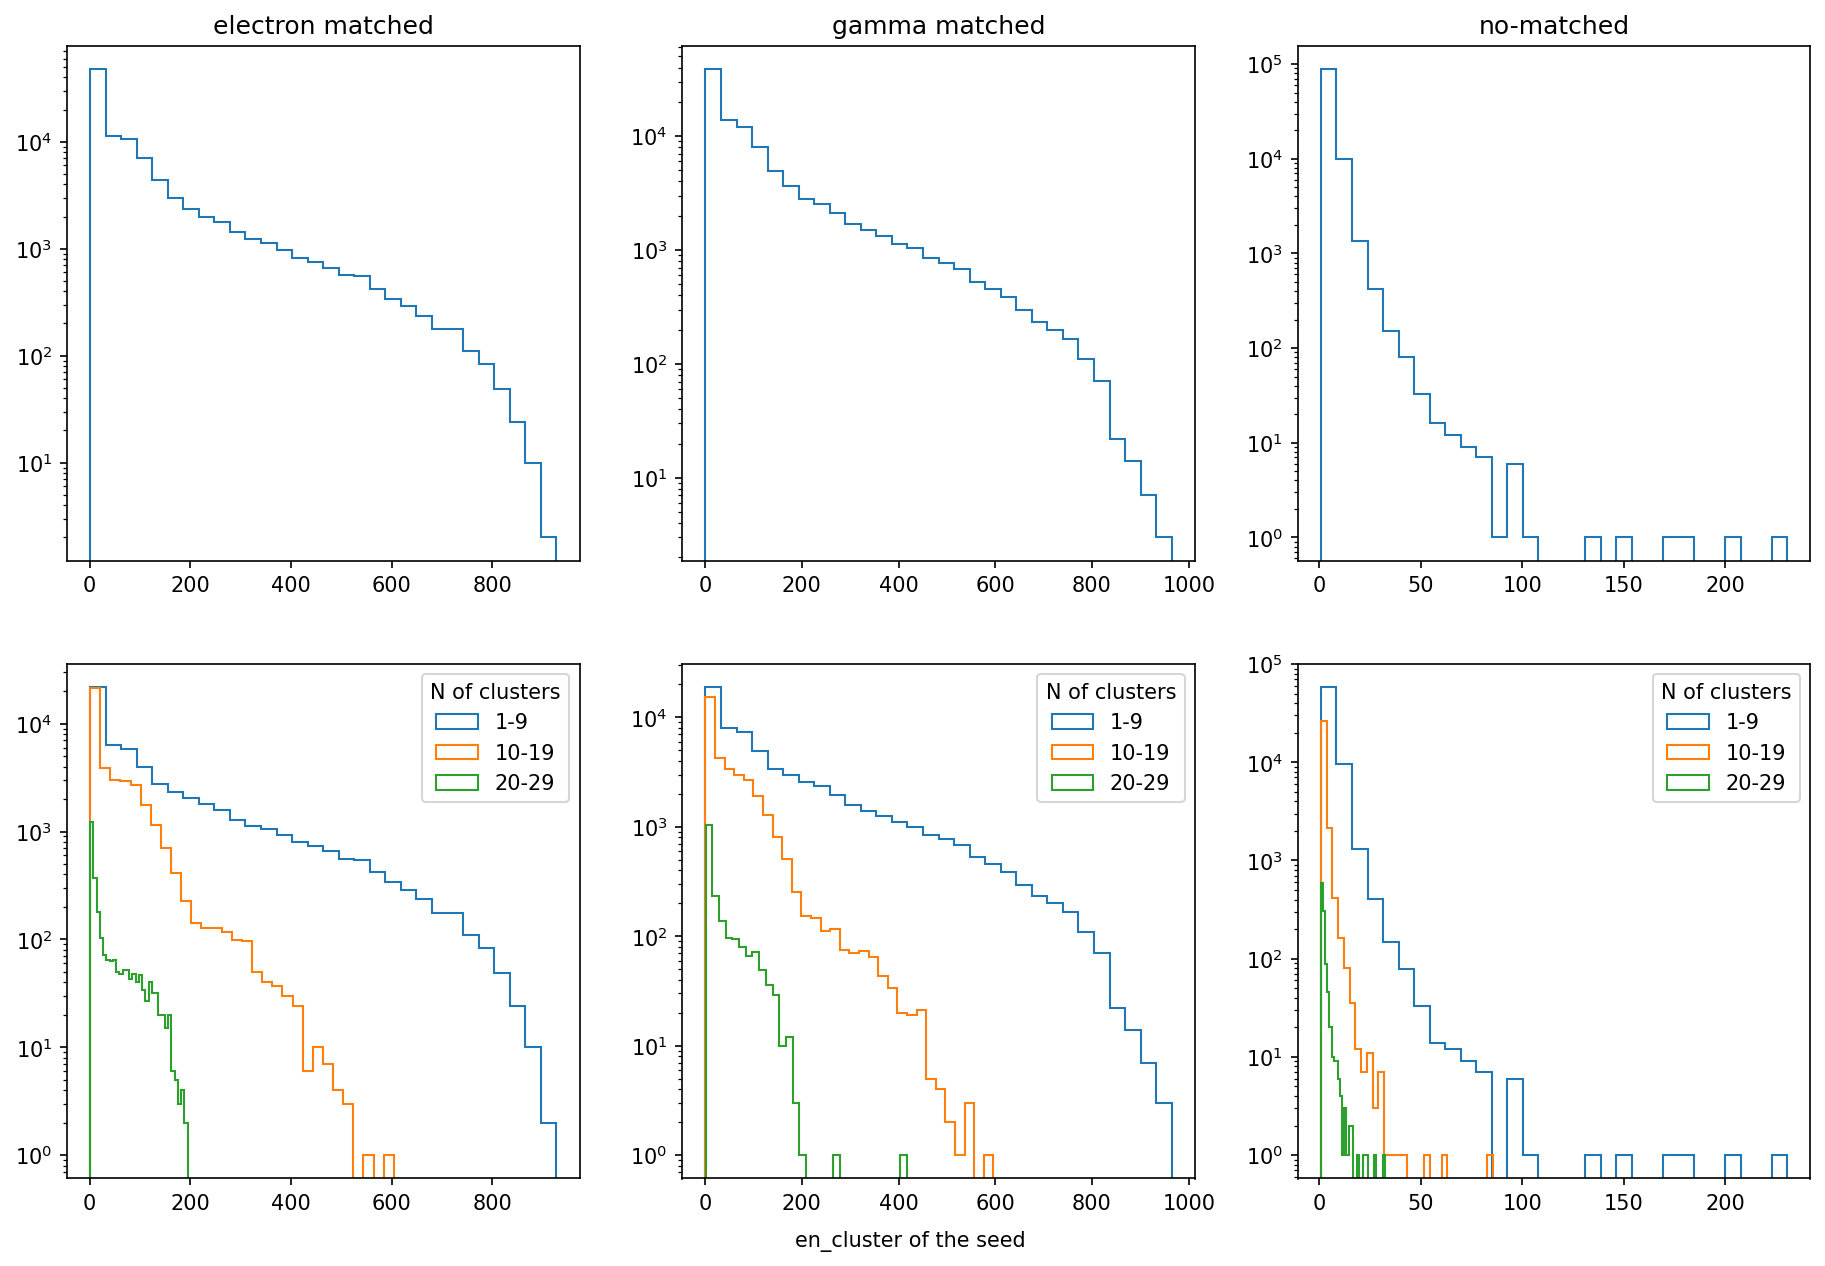

In [16]:
draw_seed('en_cluster')

# Et of the seed

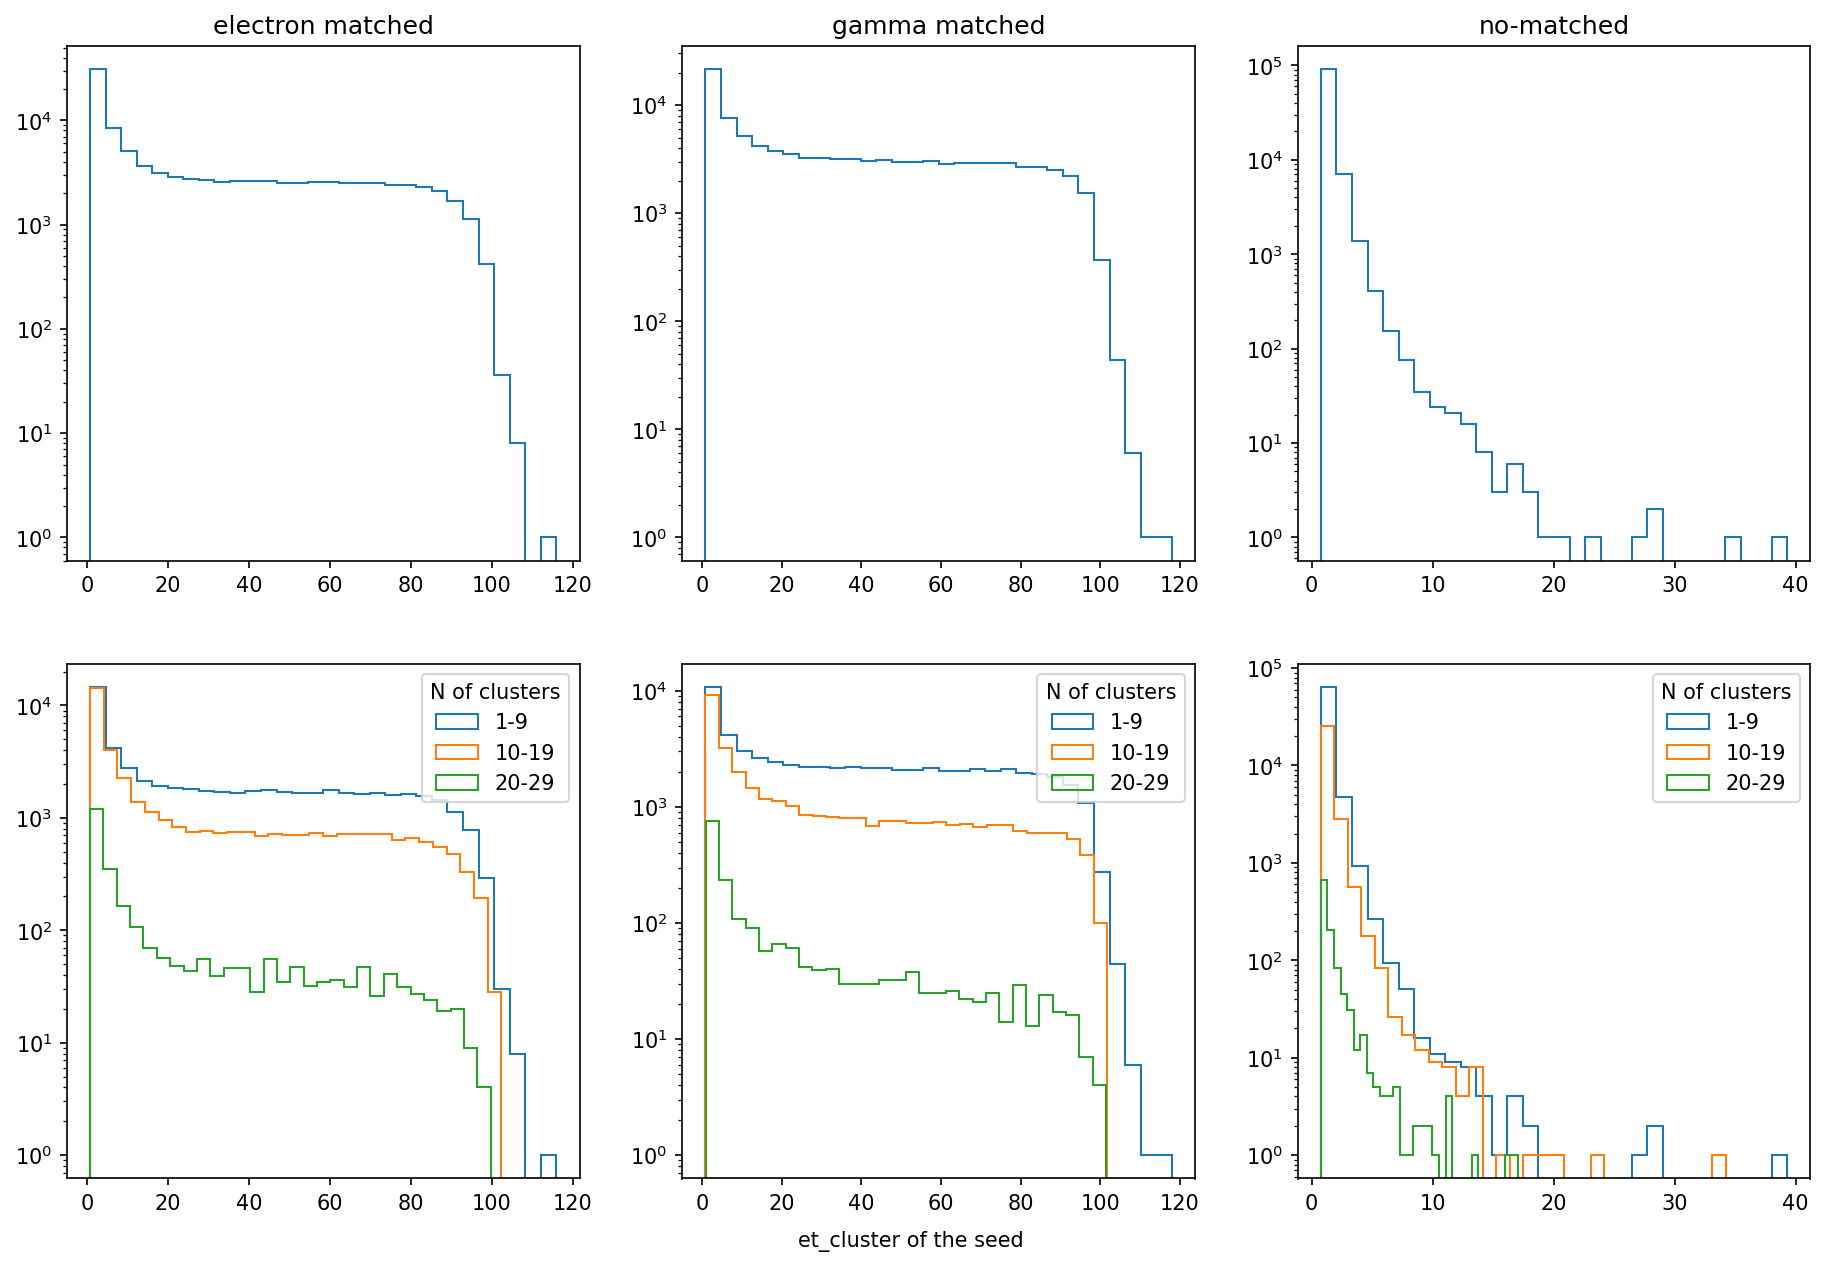

In [17]:
draw_seed('et_cluster')

# iphi of the seed

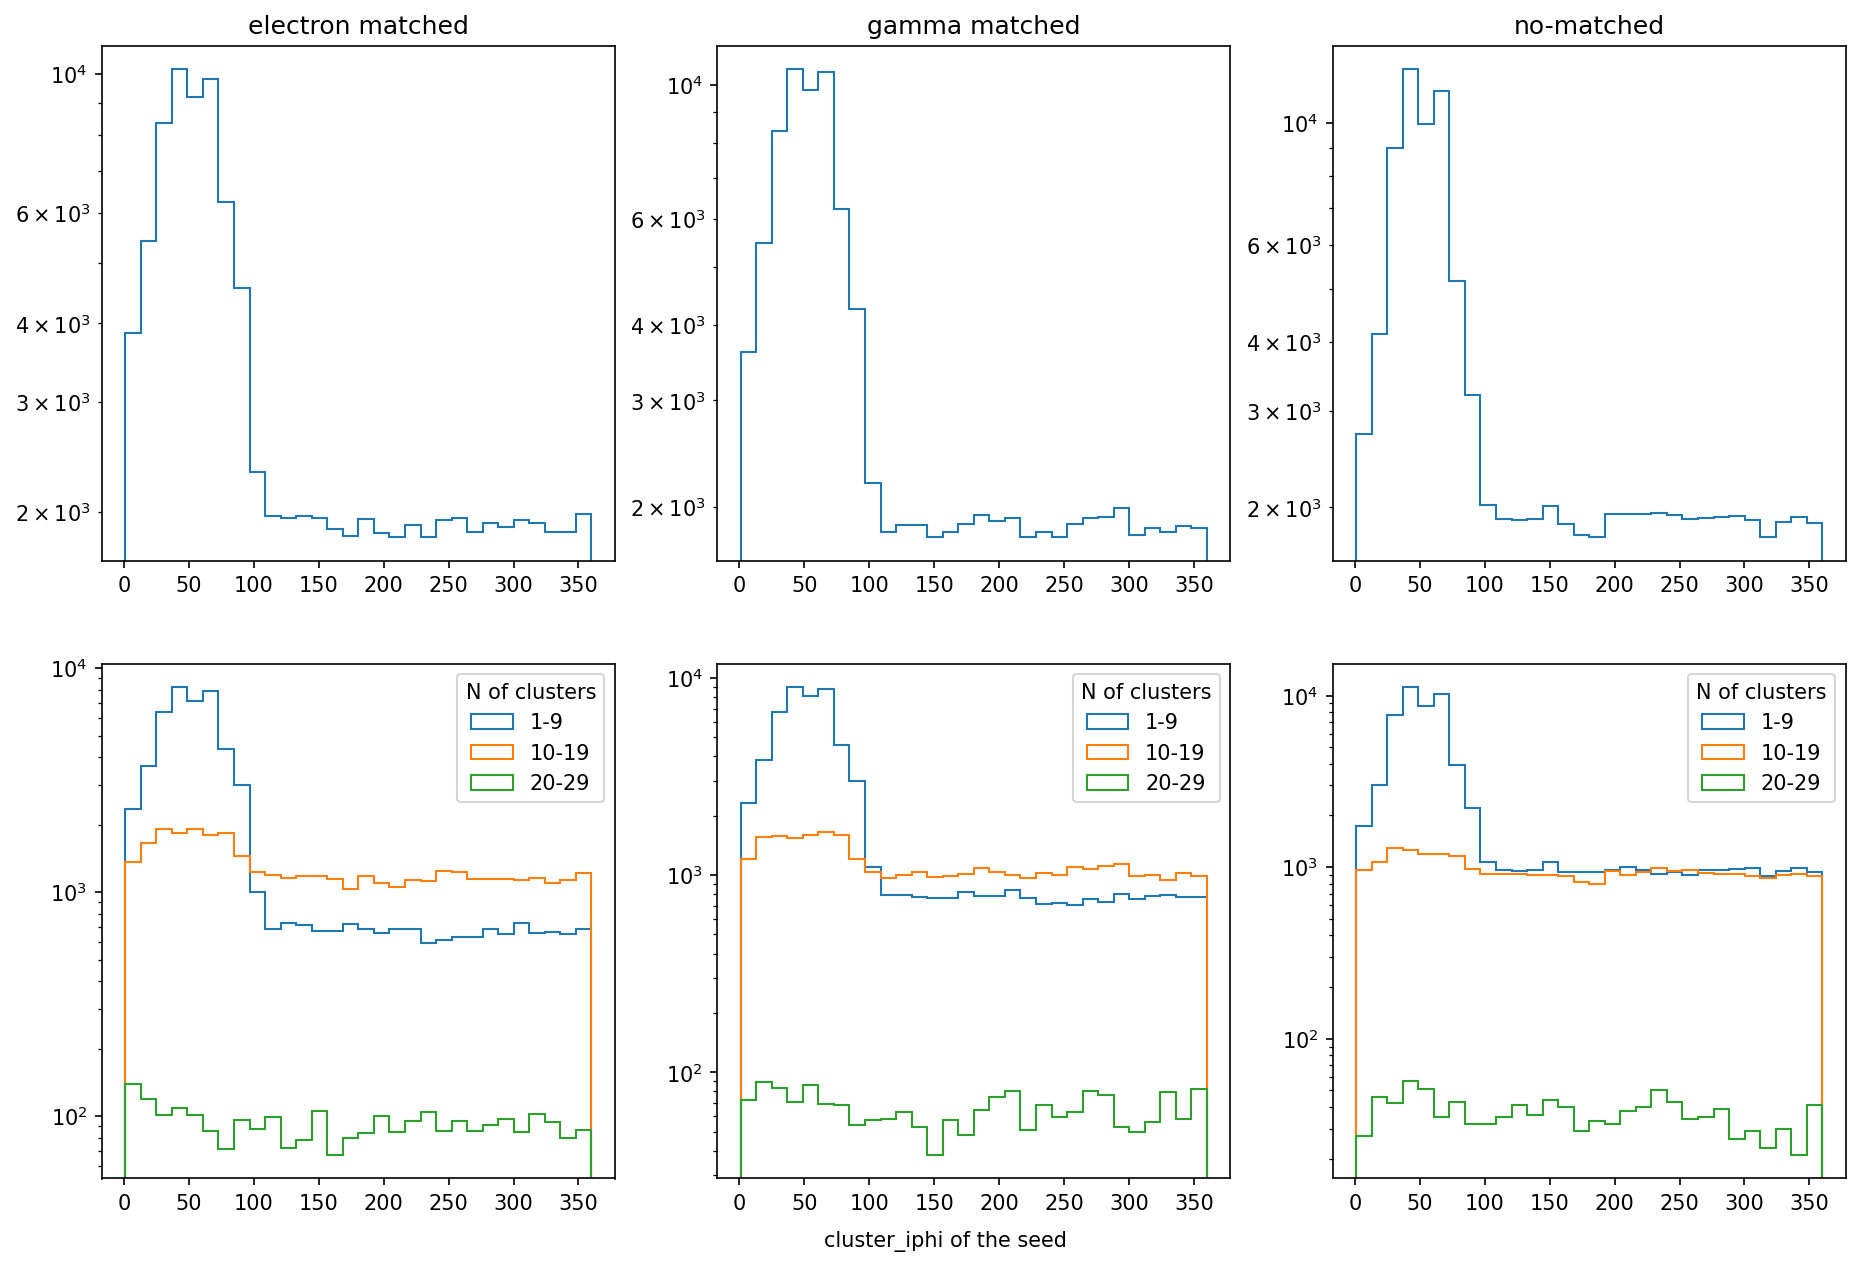

In [18]:
draw_seed('cluster_iphi')

# ieta of the seed

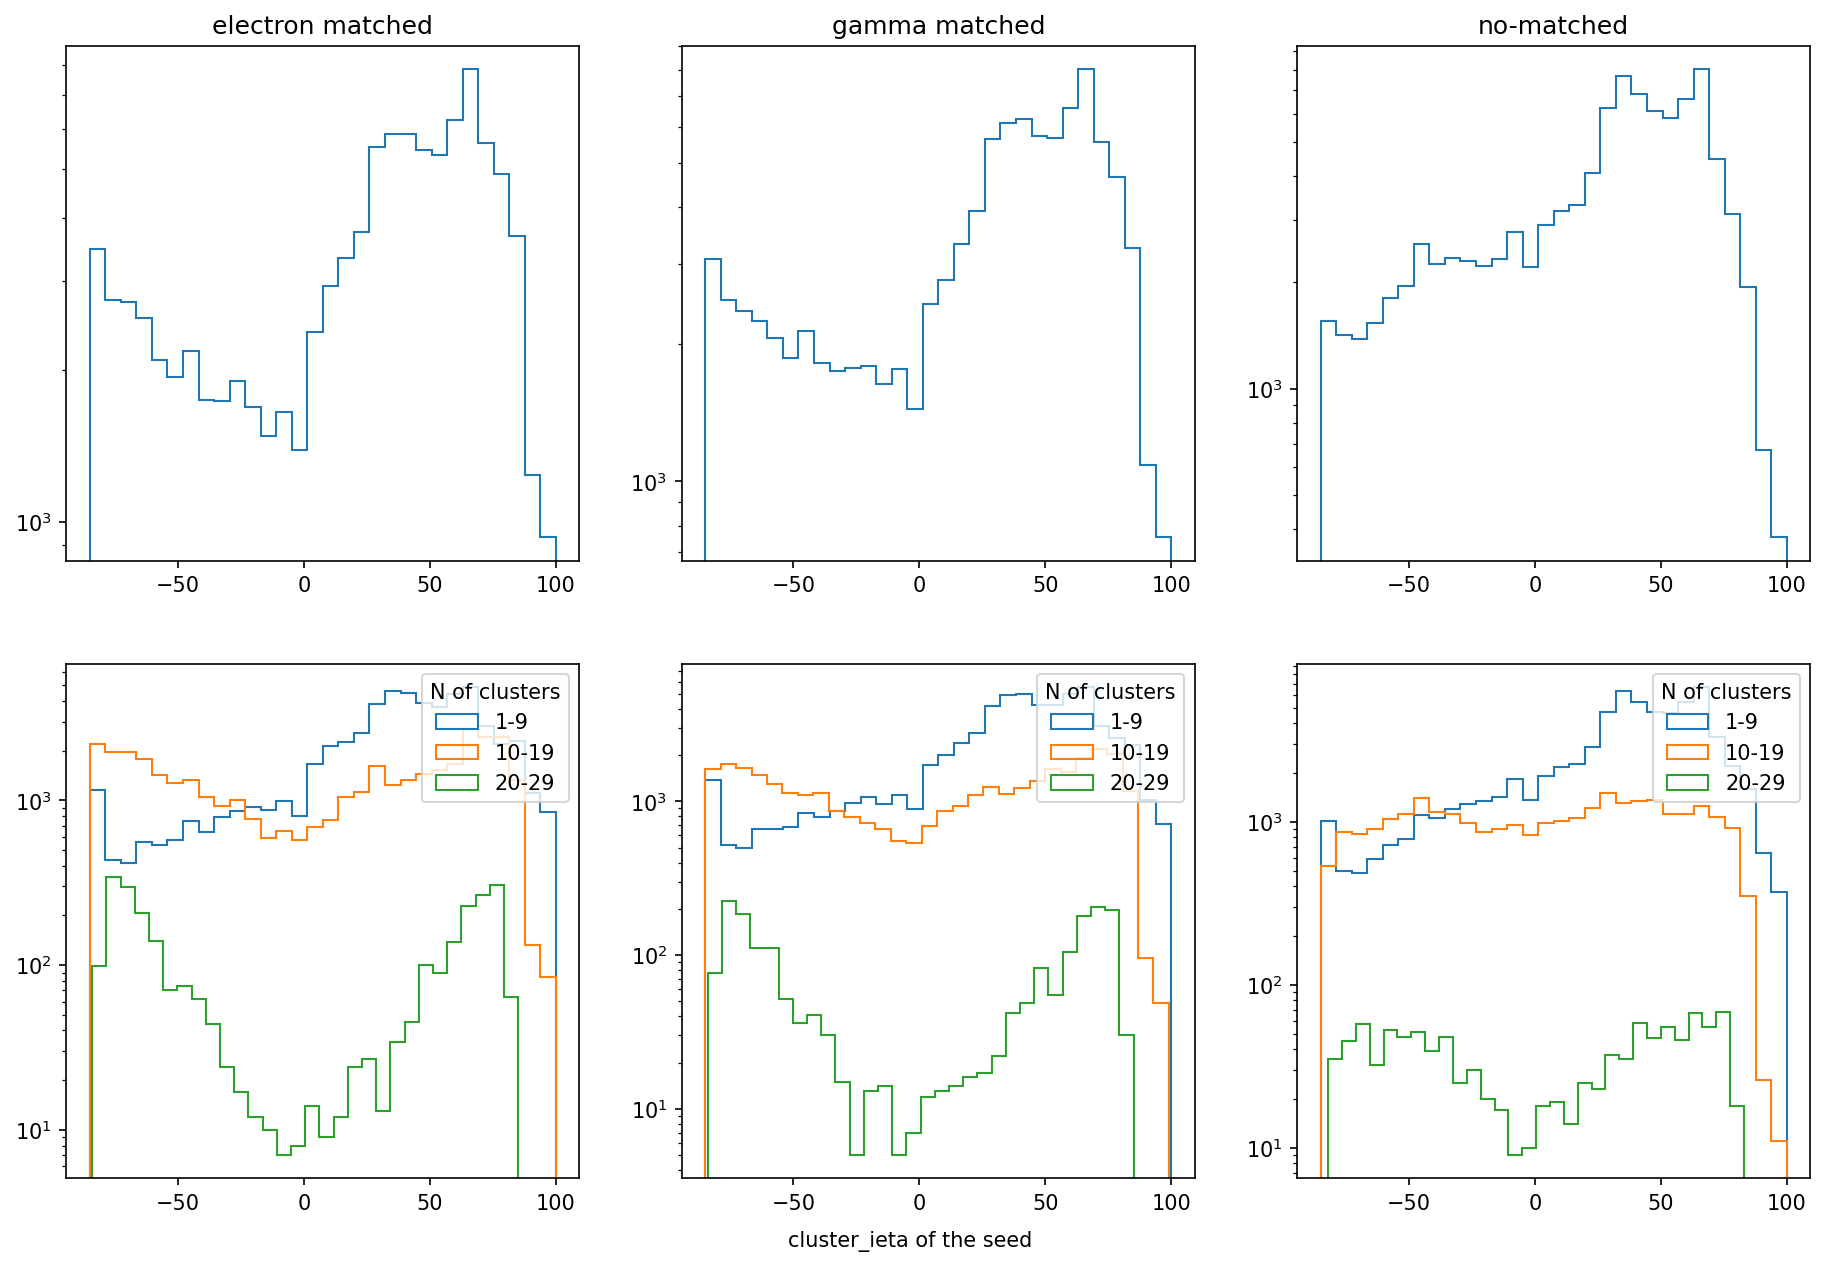

In [19]:
draw_seed('cluster_ieta')

# Energy distribution of clusters

Text(0.5, 0.08, 'E')

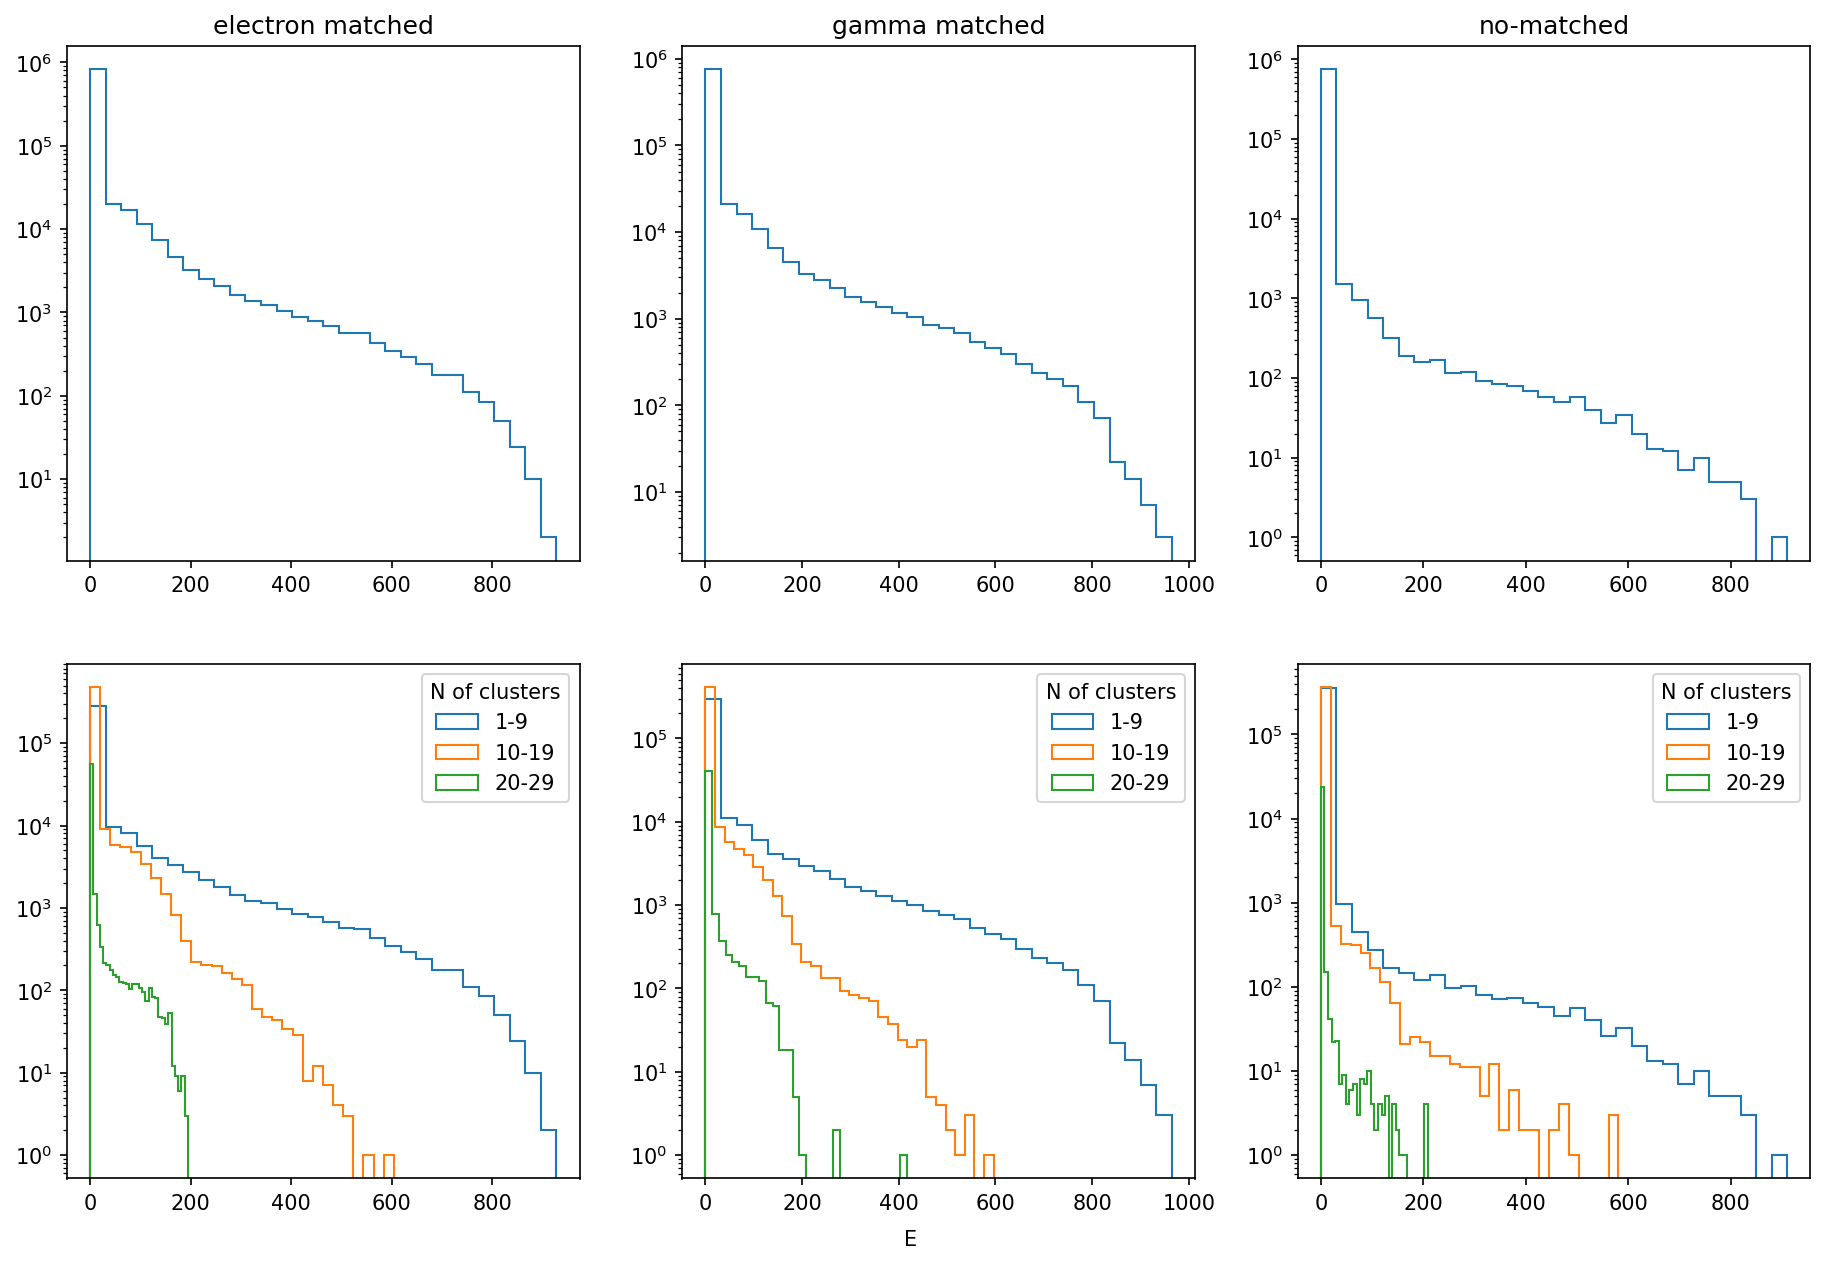

In [20]:
fig, axis = plt.subplots(2, 3, figsize=(15,10))

for i in range(len(df)):
    ax = axis[0,i]
    
    ax.hist(df[i]['en_cluster'], bins=30, histtype="step")
    ax.set_yscale("log")
    ax.set_title(df_title[i])

    ax = axis[1, i]
    for j, n in enumerate(ncl_range):
        ax.hist(df[i]['en_cluster'][df[i]['n_cl'].isin(n)], label=ncl_title[j], bins=30, histtype="step")
    ax.set_yscale("log")
    ax.legend(title="N of clusters")
    
fig.text(0.5, 0.08, 'E', ha='center')
#fig.text(0.08, 0.25, '# of clusters', va='center', rotation='vertical')

# Et distribution of clusters

Text(0.5, 0.08, 'Et')

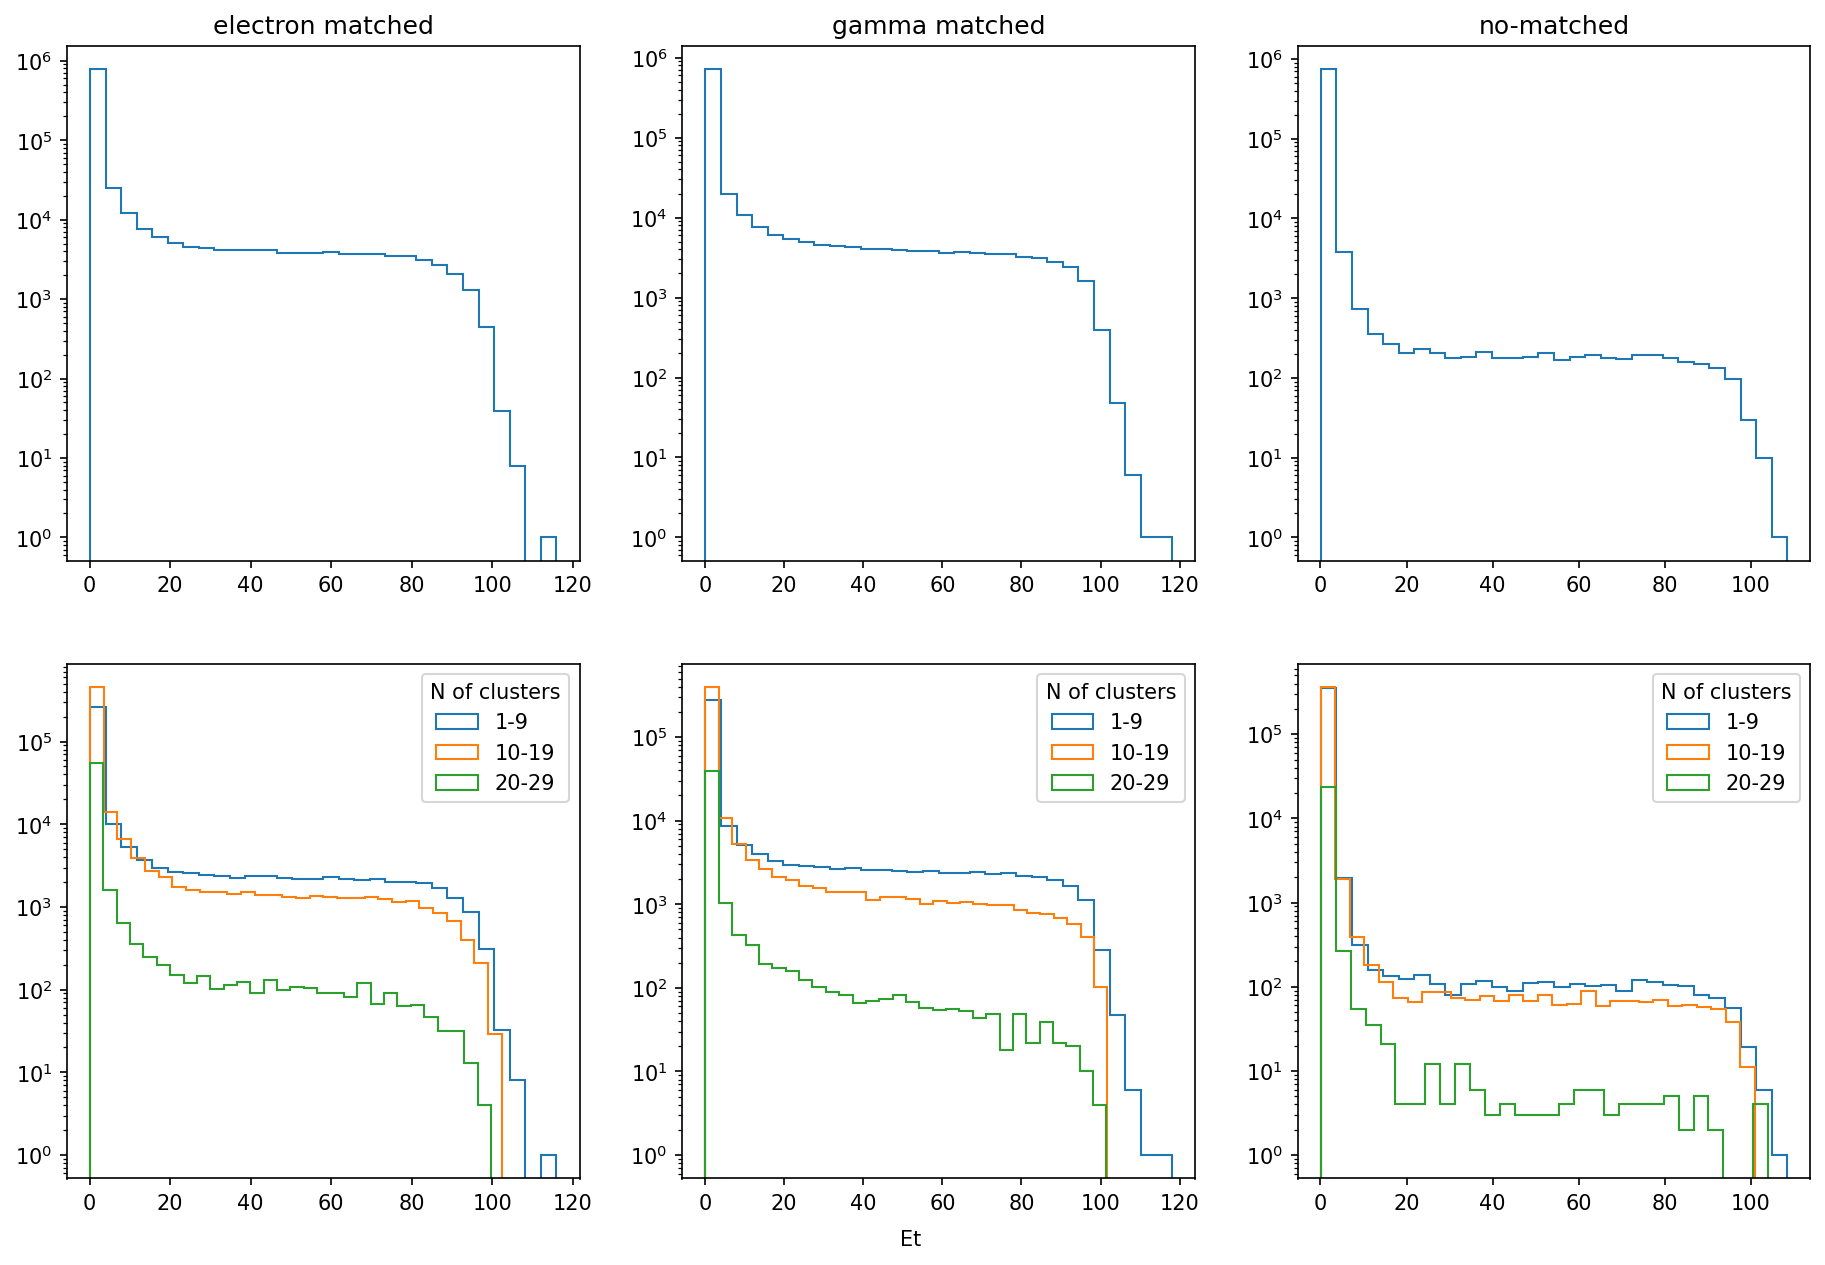

In [21]:
fig, axis = plt.subplots(2, 3, figsize=(15,10))

for i in range(len(df)):
    ax = axis[0,i]
    
    ax.hist(df[i]['et_cluster'], bins=30, histtype="step")
    ax.set_yscale("log")
    ax.set_title(df_title[i])

    ax = axis[1, i]
    for j, n in enumerate(ncl_range):
        ax.hist(df[i]['et_cluster'][df[i]['n_cl'].isin(n)], label=ncl_title[j], bins=30, histtype="step")
    ax.set_yscale("log")
    ax.legend(title="N of clusters")
fig.text(0.5, 0.08, 'Et', ha='center')
#fig.text(0.08, 0.25, '# of clusters', va='center', rotation='vertical')